In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
data = pd.read_csv('avaliacao_suporte_water_potability.csv', header=(0))

In [109]:
# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

In [110]:
print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])
# mostra os dados
data.head(10)

Número de linhas e colunas na matriz de atributos: (2011, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


In [111]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [112]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(10)


model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
np.random.seed(10)

model.fit(x_train,y_train)


#Predict the response for test dataset
y_pred = model.predict(x_test)

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.6823821339950372


In [115]:
from sklearn import metrics
np.random.seed(10)


print('Accuracy:', accuracy_score(y_test,y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6823821339950372
F1 score: 0.6394945767639495
Precision: 0.6711249600511346
Recall: 0.6380168058562738

 clasification report:
               precision    recall  f1-score   support

         0.0       0.69      0.85      0.76       244
         1.0       0.65      0.43      0.52       159

    accuracy                           0.68       403
   macro avg       0.67      0.64      0.64       403
weighted avg       0.68      0.68      0.67       403



In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_test ,y_pred)
metrics.auc(fpr, tpr)


0.6380168058562737

In [120]:
y_pred_prob = model.predict_proba(x_test)
prob_y_water = y_pred_prob[:,1]

print(y_pred_prob)


[[0.65 0.35]
 [0.43 0.57]
 [0.67 0.33]
 [0.66 0.34]
 [0.67 0.33]
 [0.52 0.48]
 [0.43 0.57]
 [0.59 0.41]
 [0.6  0.4 ]
 [0.59 0.41]
 [0.47 0.53]
 [0.52 0.48]
 [0.55 0.45]
 [0.44 0.56]
 [0.7  0.3 ]
 [0.88 0.12]
 [0.75 0.25]
 [0.3  0.7 ]
 [0.75 0.25]
 [0.56 0.44]
 [0.33 0.67]
 [0.43 0.57]
 [0.63 0.37]
 [0.55 0.45]
 [0.48 0.52]
 [0.64 0.36]
 [0.35 0.65]
 [0.73 0.27]
 [0.64 0.36]
 [0.69 0.31]
 [0.53 0.47]
 [0.59 0.41]
 [0.48 0.52]
 [0.69 0.31]
 [0.79 0.21]
 [0.55 0.45]
 [0.86 0.14]
 [0.45 0.55]
 [0.32 0.68]
 [0.66 0.34]
 [0.61 0.39]
 [0.45 0.55]
 [0.65 0.35]
 [0.97 0.03]
 [0.73 0.27]
 [0.69 0.31]
 [0.82 0.18]
 [0.5  0.5 ]
 [0.41 0.59]
 [0.66 0.34]
 [0.51 0.49]
 [0.71 0.29]
 [0.64 0.36]
 [0.4  0.6 ]
 [0.68 0.32]
 [0.54 0.46]
 [0.6  0.4 ]
 [0.71 0.29]
 [0.51 0.49]
 [0.57 0.43]
 [0.42 0.58]
 [0.65 0.35]
 [0.4  0.6 ]
 [0.59 0.41]
 [0.77 0.23]
 [0.75 0.25]
 [0.69 0.31]
 [0.35 0.65]
 [0.57 0.43]
 [0.71 0.29]
 [0.62 0.38]
 [0.93 0.07]
 [0.2  0.8 ]
 [0.61 0.39]
 [0.45 0.55]
 [0.29 0.71]
 [0.19 0.81]

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_test ,prob_y_water)
roc_df = pd.DataFrame(zip(fpr, tpr, thresholds),columns = ["FPR","TPR","Threshold"])

roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.90
1,0.000000,0.006289,0.90
2,0.000000,0.012579,0.85
3,0.004098,0.012579,0.83
4,0.004098,0.025157,0.81


In [127]:
AUC = metrics.roc_auc_score(y_test, prob_y_water)
print("AUC: %.2f%%" % (AUC * 100.0))



AUC: 69.31%


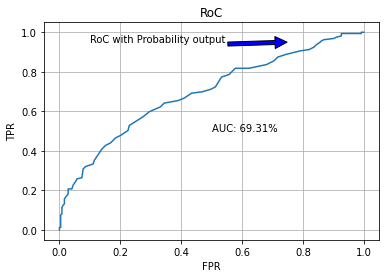

In [128]:
#Plotting the RoC on Probability output
plt.plot(roc_df.FPR, roc_df.TPR, label = "prob")
plt.title("RoC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.annotate('RoC with Probability output', xy =(0.75,0.95),xytext =(0.1,0.95), arrowprops = dict(facecolor ='blue', shrink = 0.01))
plt.annotate("AUC: %.2f%%" % (AUC * 100.0), xy =(0.5,0.5),xytext =(0.5,0.5))
plt.grid()
plt.show()

# Importancia dos Atributos

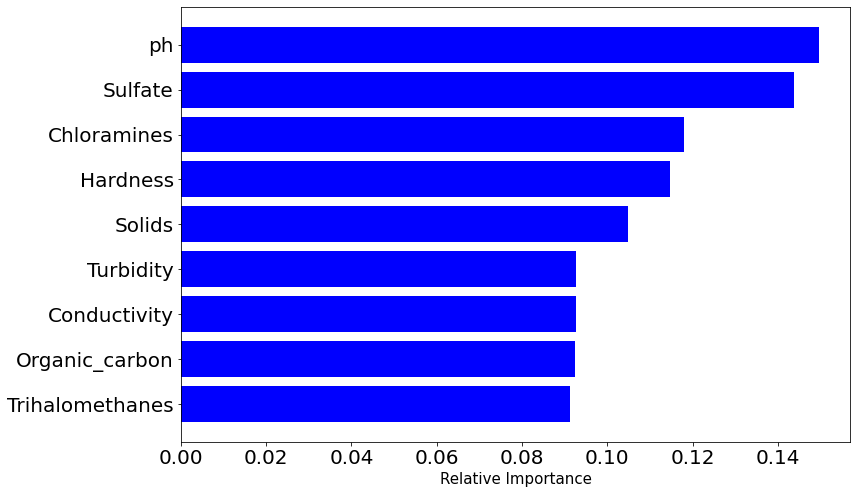

In [106]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()